<a href="https://colab.research.google.com/github/Ray88888888/Ethereum/blob/main/Delegate_or_Not_Ray_SW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
#access the data of historical Ethereum price from 2017.7.30-2021.4.25
hisPrice=pd.read_csv('https://raw.githubusercontent.com/Ray88888888/Ethereum/main/export-EtherPrice.csv')
hisPrice.head()

,Date(UTC),UnixTimeStamp,Value
0,7/30/2015,1438214400,0.0
1,7/31/2015,1438300800,0.0
2,8/1/2015,1438387200,0.0
3,8/2/2015,1438473600,0.0
4,8/3/2015,1438560000,0.0


In [ ]:
cnt = hisPrice.count
cnt

<bound method DataFrame.count of       Date(UTC)  UnixTimeStamp    Value
0     7/30/2015     1438214400     0.00
1     7/31/2015     1438300800     0.00
2      8/1/2015     1438387200     0.00
3      8/2/2015     1438473600     0.00
4      8/3/2015     1438560000     0.00
...         ...            ...      ...
2092  4/21/2021     1618963200  2357.59
2093  4/22/2021     1619049600  2410.48
2094  4/23/2021     1619136000  2369.67
2095  4/24/2021     1619222400  2216.56
2096  4/25/2021     1619308800  2322.14

[2097 rows x 3 columns]>

In [ ]:
hisPrice['ROI10Day']=hisPrice['Value'].pct_change(10)

In [ ]:
hisPrice.tail()

,Date(UTC),UnixTimeStamp,Value,ROI10Day
2092,4/21/2021,1618963200,2357.59,0.096278
2093,4/22/2021,1619049600,2410.48,0.127557
2094,4/23/2021,1619136000,2369.67,0.030892
2095,4/24/2021,1619222400,2216.56,-0.088533
2096,4/25/2021,1619308800,2322.14,-0.077447


In [ ]:
hisPrice1 = hisPrice.replace([np.inf, -np.inf], np.nan, inplace=True)
hisPrice1 = hisPrice.dropna()

In [ ]:
hisPrice1.head()

,Date(UTC),UnixTimeStamp,Value,ROI10Day
18,8/17/2015,1439769600,1.20,-0.566787
19,8/18/2015,1439856000,1.27,0.567901
20,8/19/2015,1439942400,1.26,0.702703
21,8/20/2015,1440028800,1.48,1.176471
22,8/21/2015,1440115200,1.44,0.358491


In [ ]:
hisPrice1.tail()

,Date(UTC),UnixTimeStamp,Value,ROI10Day
2092,4/21/2021,1618963200,2357.59,0.096278
2093,4/22/2021,1619049600,2410.48,0.127557
2094,4/23/2021,1619136000,2369.67,0.030892
2095,4/24/2021,1619222400,2216.56,-0.088533
2096,4/25/2021,1619308800,2322.14,-0.077447


In [ ]:
hisPrice1['ROI10Day'].mean()

0.060124079728077005

In [ ]:
#randomly pick 10 days as the beggining days of ten investment periods
import random
investday1 = random.sample(range(1, 2098), 10)
investday1

[1731, 1219, 1844, 1957, 1505, 1930, 950, 1963, 1889, 657]

In [ ]:
#in the pilot experiment, we will use 1731, 950, 1889 as representatives (1，7，9三列)
investday1 = [1731, 1219, 1844, 1957, 1505, 1930, 950, 1963, 1889, 657]

In [ ]:
investData = pd.DataFrame(columns=range(1,11),index=range(1,41))
investData.columns.name = 'Periods'
investData.index.name = 'Days'
investData.head()

Periods,1,2,3,4,5,6,7,8,9,10
Days,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#pick the price data of 30 days before 'investday1' and 10 days after 'investdat1'(inluding 'investday1')

periodCounter = 1
for i in investday1:
  period = range(i-30,i+10)
  dayCounter = 1
  for k in period:
    investData[periodCounter][dayCounter] = hisPrice['Value'][k]
    dayCounter += 1
  periodCounter += 1

investData.head()
investData.tail()

Periods,1,2,3,4,5,6,7,8,9,10
Days,,,,,,,,,,
36,206.27,101.57,387.98,568.26,207.9,448.51,720.36,654.55,353.84,160.39
37,211.98,90.43,395.46,590.72,210.5,461.01,697.02,658.7,340.85,169.5
38,214.15,93.61,390.72,586.35,221.01,482.71,689.96,638.17,341.91,193.03
39,210.06,91.44,408.03,589.17,218.26,478.76,613.15,607.9,351.2,177.33
40,206.94,94.42,383.34,637.74,215.1,471.82,610.56,637.23,365.41,162.83


In [79]:
#Draw in plotly// plot line chart for AI Strategy (Day1 - Day10 Ether Price)
import plotly.express as px

for i in [1,7,9]:
  Days = range(1,11)
  Price = investData[i]
  Price = Price[30:]

  fig = px.line( x = Days, y = Price, title = 'Ether Price in the Investment Periods (Day1-Day10)')
  fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(l=50,r=50,b=100,t=100,pad=4),
    xaxis=dict(title_text="Days"),
    yaxis=dict(title_text="Price"),
    paper_bgcolor="LightSteelBlue",)
  fig.show()

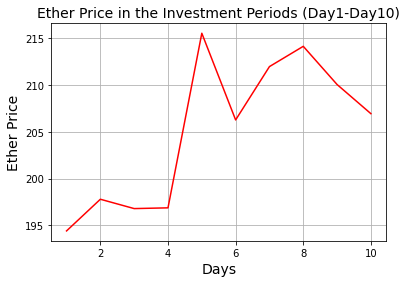

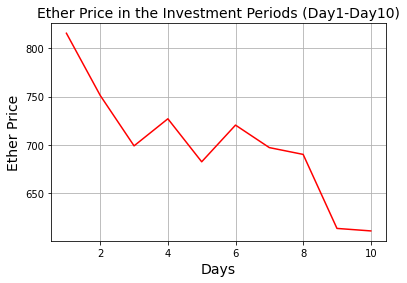

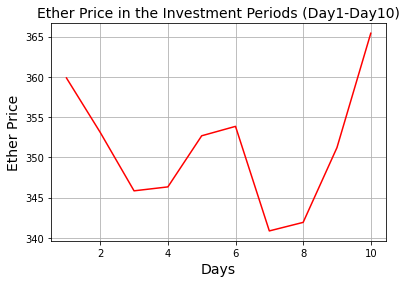

In [78]:
#Draw in matplot// plot line chart for AI Strategy (Day1 - Day10 Ether Price)
import matplotlib.pyplot as plt

for i in [1,7,9]:
  Days = range(1,11)
  Price = investData[i]
  Price = Price[30:]

  plt.plot(Days, Price, color = 'red')
  plt.title('Ether Price in the Investment Periods (Day1-Day10)', fontsize = 14)
  plt.xlabel('Days', fontsize = 14)
  plt.ylabel('Ether Price', fontsize = 14)
  plt.grid(True)
  plt.show()

In [87]:
#Draw in plotly// plot line chart for Discretional Strategy (Past 30 days Ether Price for Day1 - Day10)
for j in [1,7,9]:
  for i in range(1,11):
    Days = range(1,31)
    Price = investData[j]
    Price = Price[i-1:i+29]

    if j==1:
      k=1
    elif j==7:
      k=2
    elif j==9:
      k=3

    fig = px.line( x = Days, y = Price, title = 'Ether Price in the Past 30 Days (Period {}, Day {})'.format(k, i))
    
    fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(l=50,r=50,b=100,t=100,pad=4),
    xaxis=dict(title_text="Days"),
    yaxis=dict(title_text="Price"),
    paper_bgcolor="LightSteelBlue",)

    fig.add_annotation(x=30, y=Price[i+29],
            text="Day{}: Ether Price={}".format(i-1, Price[i+29]),
            showarrow=False,
            arrowhead=1)

    fig.show()

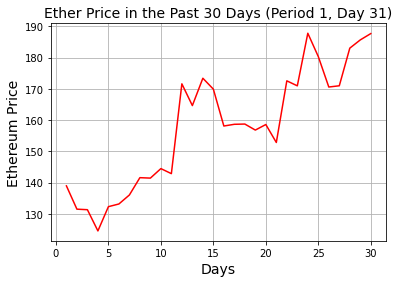

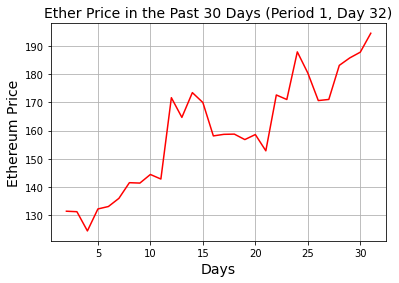

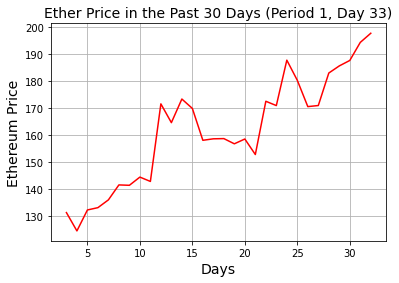

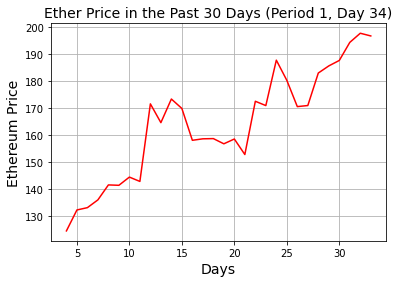

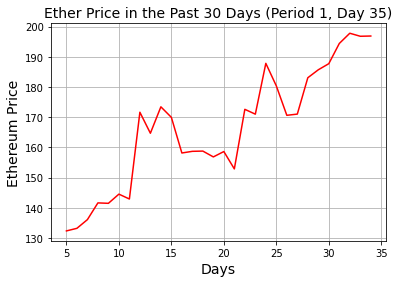

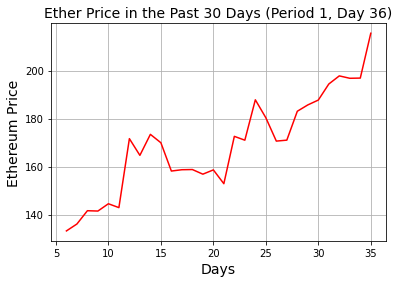

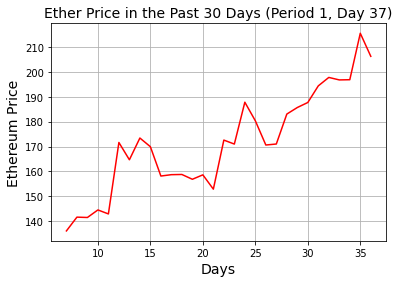

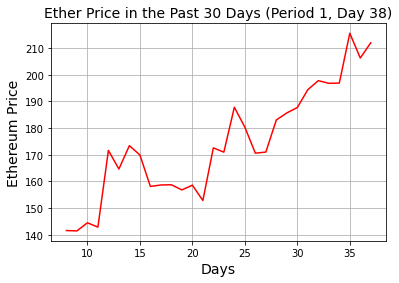

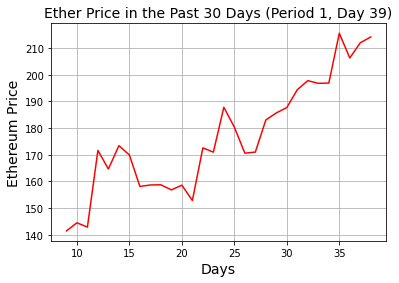

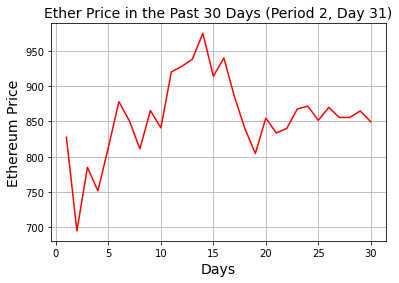

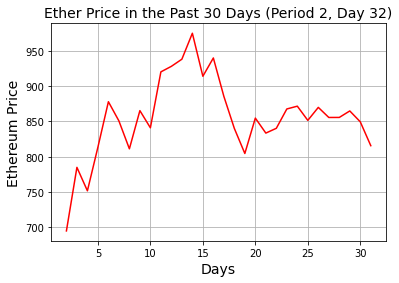

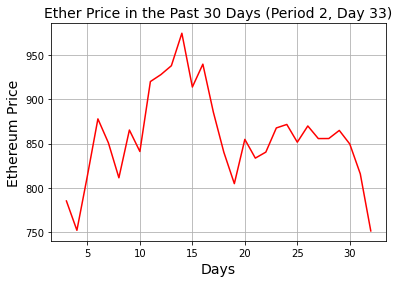

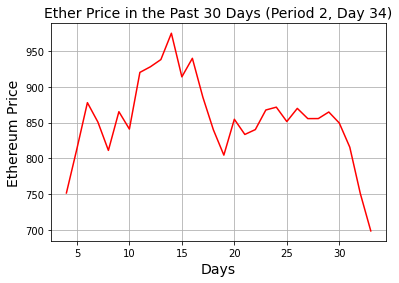

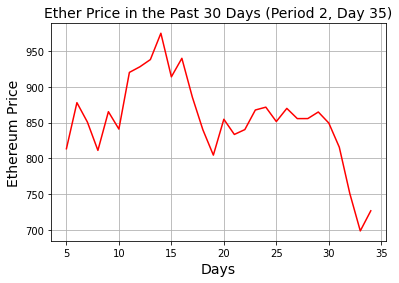

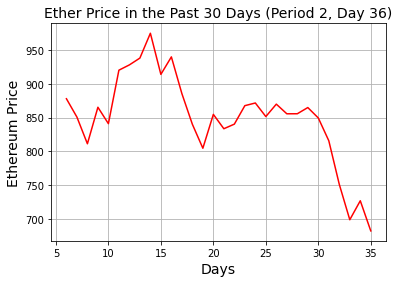

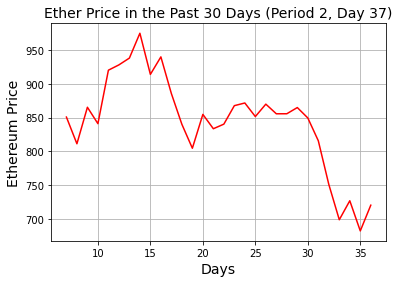

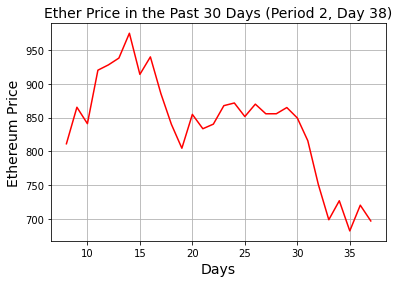

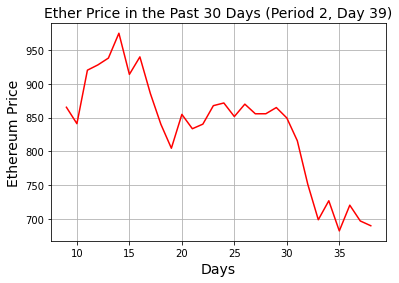

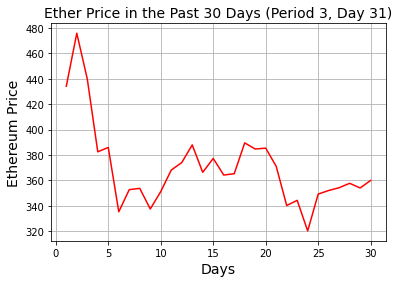

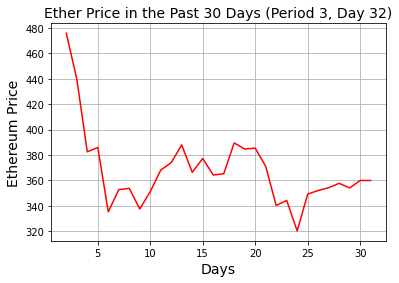

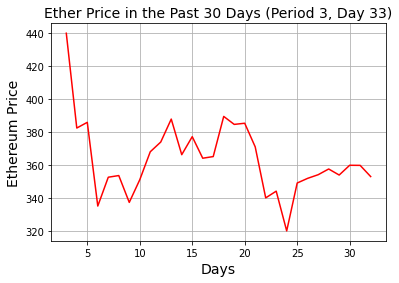

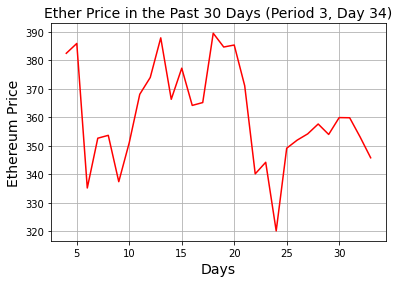

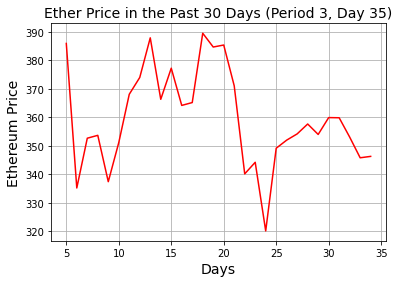

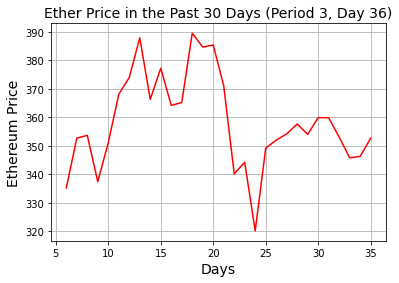

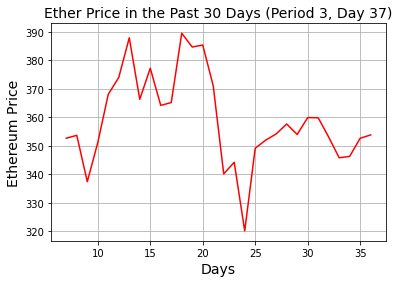

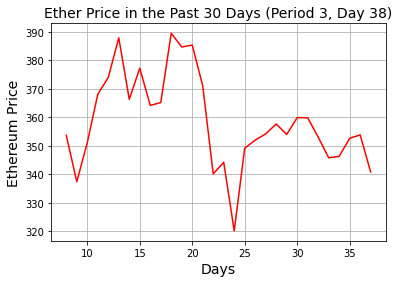

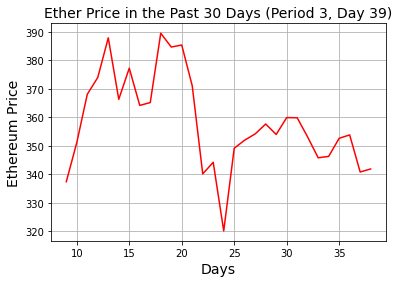

In [60]:
#Draw in matplot// plot line chart for Discretional Strategy (Past 30 days Ether Price for Day31 - Day39)
for j in [1,7,9]:
  for i in range(31,40):
    Days = range(i-30,i)
    Price = investData[j]
    Price = Price[i-31:i-1]

    if j==1:
      k=1
    elif j==7:
      k=2
    elif j==9:
      k=3

    plt.plot(Days, Price, color = 'red')
    plt.title('Ether Price in the Past 30 Days (Period {},Day {})'.format(k, i), fontsize = 14)
    plt.xlabel('Days', fontsize = 14)
    plt.ylabel('Ethereum Price', fontsize = 14)
    plt.grid(True)
    plt.show()

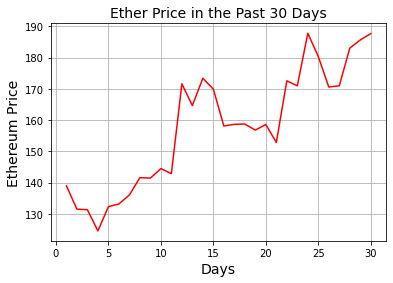

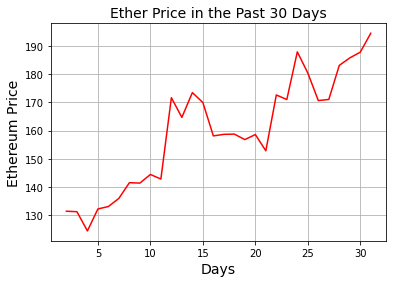

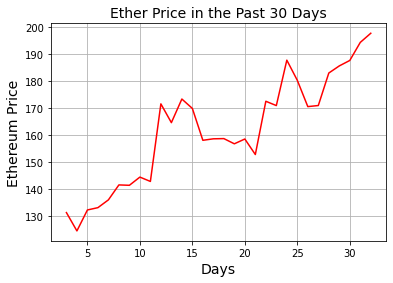

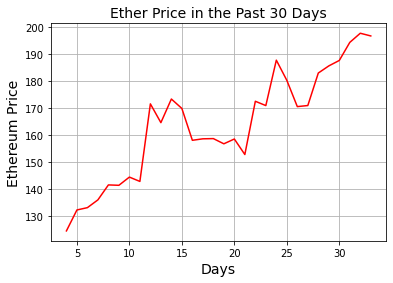

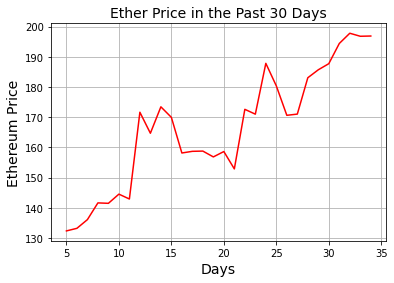

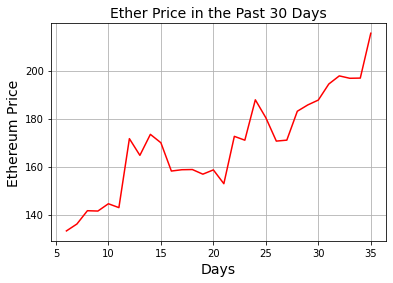

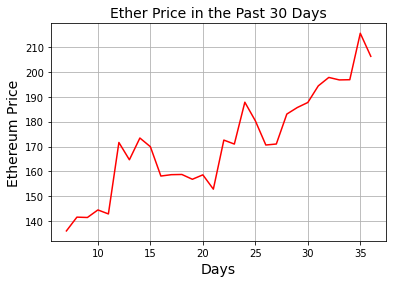

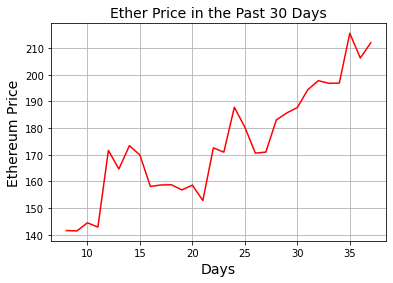

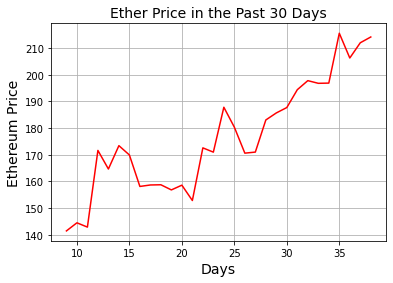

In [57]:
#Draw in matplot// plot line chart for Discretional Strategy (Past 30 days Ether Price for Day31 - Day39)
for i in range(31,40):
    Days = range(i-30,i)
    Price = investData[1]
    Price = Price[i-31:i-1]

    plt.plot(Days, Price, color = 'red')
    plt.title('Ether Price in the Past 30 Days', fontsize = 14)
    plt.xlabel('Days', fontsize = 14)
    plt.ylabel('Ethereum Price', fontsize = 14)
    plt.grid(True)
    plt.show()

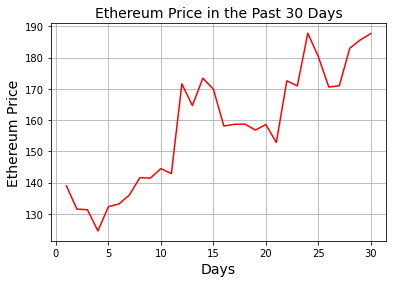

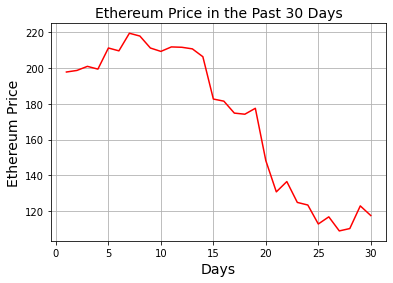

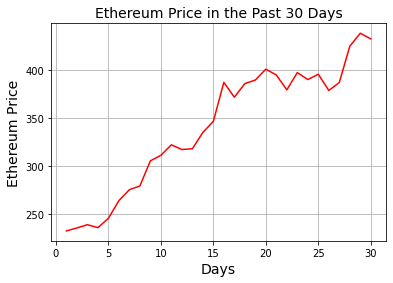

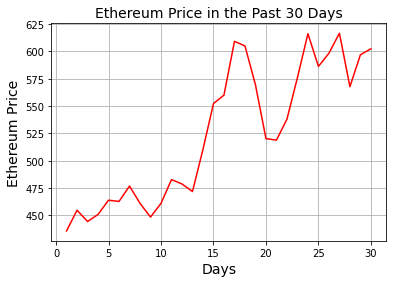

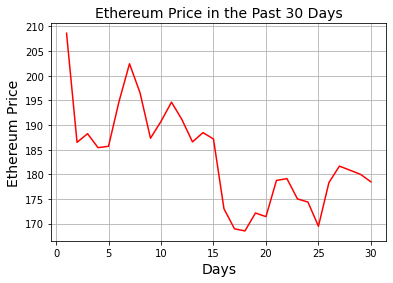

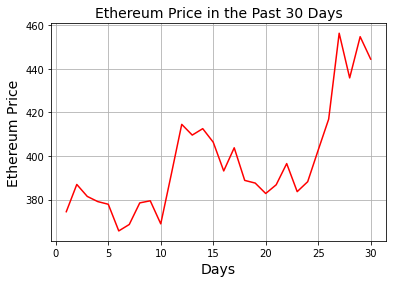

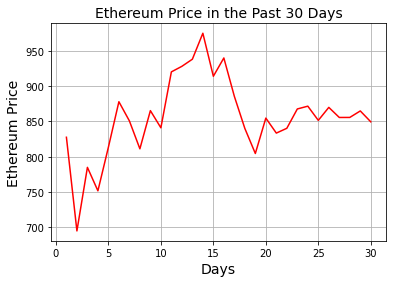

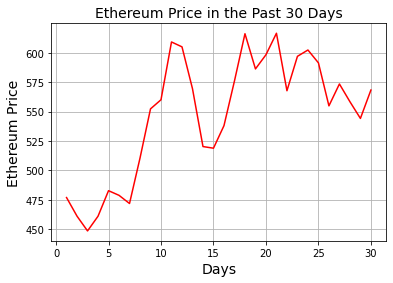

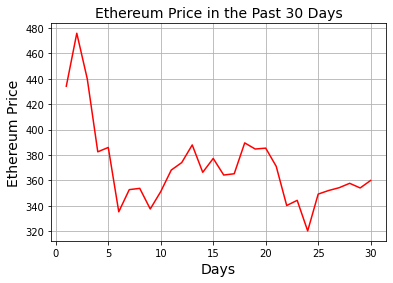

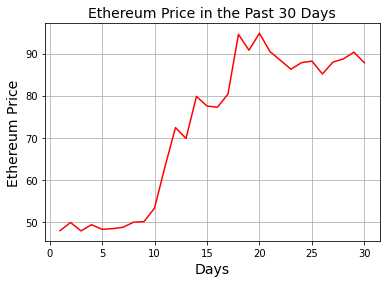

In [ ]:
import matplotlib.pyplot as plt

for i in range(1,11):
  Days = range(1,31)
  Price = investData[i]
  Price = Price[:30]

  plt.plot(Days, Price, color = 'red')
  plt.title('Ethereum Price in the Past 30 Days', fontsize = 14)
  plt.xlabel('Days', fontsize = 14)
  plt.ylabel('Ethereum Price', fontsize = 14)
  plt.grid(True)
  plt.show()

In [ ]:
investData

Periods,1,2,3,4,5,6,7,8,9,10
Days,,,,,,,,,,
1,138.97,197.85,232.77,435.82,208.62,374.4,827.59,476.87,434.1,47.94
2,131.51,198.73,235.84,454.74,186.49,386.91,695.08,461.03,475.81,49.88
3,131.34,201.02,239.22,444.45,188.24,381.41,785.01,448.51,439.83,47.88
4,124.55,199.47,236.16,450.86,185.41,379.04,751.81,461.01,382.46,49.36
5,132.31,211.3,245.87,463.91,185.69,377.82,813.55,482.71,385.91,48.27
6,133.17,209.7,264.32,462.78,194.77,365.58,877.88,478.76,335.24,48.41
7,136.05,219.56,275.65,476.87,202.43,368.53,850.75,471.82,352.69,48.75
8,141.59,217.99,279.6,461.03,196.55,378.44,811.24,510.43,353.7,49.94
9,141.45,211.29,305.67,448.51,187.32,379.41,865.27,552.26,337.45,50.09
